In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

# VEST CO 2020

Election results from the Colorado Secretary of State (https://www.sos.state.co.us/pubs/elections/Results/Archives.html)
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program. The following counties used shapefiles sourced from the respective county governments instead: Adams, Arapahoe, Boulder, Delta, Denver, Douglas, El Paso, Fremont, Garfield, Gilpin, Jefferson, La Plata, Larimer, Mesa, Pitkin, Pueblo, Summit, Weld.  

Las Animas County precinct assignments in the voter file differ markedly from both the Census VTD boundaries and from maps received from the county. All precincts were revised to match the geocoded voter file and the list of districts assigned to precinct splits. As appropriate, precinct boundaries were revised using Census blocks, the Trinidad municipal boundary shapefile, school district or fire district boundaries, and the parcel shapefile from the Las Animas County Assessor.  

The following additional revisions were made to match the 2020 precinct boundaries:  

Logan: Align Sterling City precincts with city limits  
Montezuma: Precincts renumbered to match county maps  
Morgan: Split Precincts 1/18 to match county maps  
Otero: Align La Junta City precincts with county maps  
Prowers: All precincts adjusted to match county maps  
Rio Grande: Adjust Precincts 2/3 to match county maps  

G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PRECBLA - Don Blankenship (American Constitution Party)  
G20PREUWES - Kanye West (Unaffiliated)  
G20PREOOTH - Other Candidates  

G20USSDHIC - John W. Hickenlooper (Democratic Party)  
G20USSRGAR - Cory Gardner (Republican Party)  
G20USSLDOA - Raymon Anthony Doane (Libertarian Party)  
G20USSODOY - Daniel Doyle (Approval Voting Party)  
G20USSOEVA - Stehpan "Seku" Evans (Unity Party)  
G20USSOWRI - Write-in Votes  

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/co_2020/co_2020.shp")

In [3]:
vest_shp.shape

(3215, 19)

In [4]:
vest_shp.head(10)

,STATEFP,COUNTYFP,VTDST,NAME,PRECINCT,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREUWES,G20PREOOTH,G20USSDHIC,G20USSRGAR,G20USSLDOA,G20USSODOY,G20USSOEVA,G20USSOWRI,geometry
0,08,001,001226,Adams 226,6253001226,60,128,1,1,0,0,0,60,131,3,0,1,0,"POLYGON Z ((-104.67850 39.97236 0.00000, -104...."
1,08,001,001092,Adams 092,7243401092,653,579,22,3,2,1,6,649,572,37,4,1,0,"POLYGON Z ((-104.96793 39.91400 0.00000, -104...."
2,08,001,001089,Adams 089,7243101089,666,454,26,5,1,2,7,645,469,37,6,2,0,"POLYGON Z ((-104.95210 39.92118 0.00000, -104...."
3,08,001,001087,Adams 087,7243401087,690,467,31,5,4,6,6,668,475,50,5,7,1,"POLYGON Z ((-104.95909 39.92851 0.00000, -104...."
4,08,001,001088,Adams 088,7243101088,706,516,21,1,3,4,5,695,543,12,7,5,0,"POLYGON Z ((-104.94884 39.92847 0.00000, -104...."
5,08,001,001147,Adams 147,7243101147,842,677,21,4,2,9,12,828,683,34,4,6,0,"POLYGON Z ((-104.92660 39.92846 0.00000, -104...."
6,08,001,001086,Adams 086,7243101086,508,472,15,9,1,2,5,488,505,9,2,0,0,"POLYGON Z ((-104.94031 39.93969 0.00000, -104...."
7,08,001,001085,Adams 085,7243101085,620,477,24,2,2,1,2,575,515,31,1,3,0,"POLYGON Z ((-104.94903 39.93492 0.00000, -104...."
8,08,001,001083,Adams 083,7243401083,599,468,19,1,3,2,3,569,481,26,4,2,0,"POLYGON Z ((-104.96966 39.93278 0.00000, -104...."
9,08,001,001082,Adams 082,7243401082,542,382,20,1,6,1,3,512,422,20,0,0,0,"POLYGON Z ((-104.97491 39.93973 0.00000, -104...."


<AxesSubplot:>

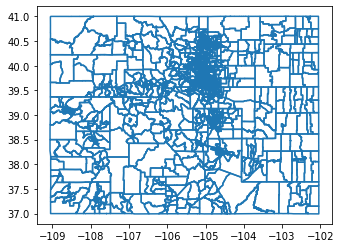

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST.

In [6]:
election_results = pd.read_excel("raw-from-source/sos/2020GEPrecinctLevelResultsPosted.xlsx")

In [7]:
election_results.head(10)

,State,Year,Election Type,County,Precinct,Office/Issue/Judgeship,Candidate,Party,Candidate Votes,Yes Votes,No Votes
0,Colorado,2020,G,Adams,4253001245,President/Vice President,Joseph R. Biden / Kamala D. Harris,Democratic Party,72,0,0
1,Colorado,2020,G,Adams,4253001245,President/Vice President,Donald J. Trump / Michael R. Pence,Republican Party,279,0,0
2,Colorado,2020,G,Adams,4253001245,President/Vice President,Don Blankenship / William Mohr,American Constitution Party,0,0,0
3,Colorado,2020,G,Adams,4253001245,President/Vice President,Bill Hammons / Eric Bodenstab,Unity Party of Colorado,0,0,0
4,Colorado,2020,G,Adams,4253001245,President/Vice President,Howie Hawkins / Angela Nicole Walker,Green Party,0,0,0
5,Colorado,2020,G,Adams,4253001245,President/Vice President,Blake Huber / Frank Atwood,Approval Voting Party,0,0,0
6,Colorado,2020,G,Adams,4253001245,President/Vice President,"Jo Jorgensen / Jeremy ""Spike"" Cohen",Libertarian Party,5,0,0
7,Colorado,2020,G,Adams,4253001245,President/Vice President,Brian Carroll / Amar Patel,American Solidarity Party,0,0,0
8,Colorado,2020,G,Adams,4253001245,President/Vice President,Mark Charles / Adrian Wallace,Unaffiliated,0,0,0
9,Colorado,2020,G,Adams,4253001245,President/Vice President,Phil Collins / Billy Joe Parker,Prohibition Party,0,0,0


In [8]:
vest2raw_conversion = { 
    "G20PREDBID" : "Joseph R. Biden / Kamala D. Harris",
    "G20PRERTRU" : "Donald J. Trump / Michael R. Pence",
    "G20PRELJOR" : """Jo Jorgensen / Jeremy "Spike" Cohen""",
    "G20PREGHAW" : "Howie Hawkins / Angela Nicole Walker",
    "G20PRECBLA" : "Don Blankenship / William Mohr",
    "G20PREUWES" : "Kanye West / Michelle Tidball",
    "G20PREOOTH" : "President/Vice President",
    "G20USSDHIC" : "John W. Hickenlooper",
    "G20USSRGAR" : "Cory Gardner",
    "G20USSLDOA" : "Raymon Anthony Doane",
    "G20USSODOY" : "Daniel Doyle",
    "G20USSOEVA" : """Stephan "Seku" Evans""",
    "G20USSOWRI" : "United States Senator"
} 

raw2vest = {val : key for key, val in vest2raw_conversion.items()}

## Rename all candidates included in VEST, combine all candidates that VEST does not explicitly separate:

In [9]:
election_results = election_results.copy()

prc2county = {str(prc) : county for prc, county in zip(election_results["Precinct"], election_results["County"])}
offices = ["President/Vice President", "United States Senator"]
election_results = election_results[election_results["Office/Issue/Judgeship"].isin(offices)].copy()
temp = pd.pivot_table(election_results, index="Precinct", columns=["Office/Issue/Judgeship", "Candidate"], values="Candidate Votes", aggfunc="first")

convert = lambda name: raw2vest[name] if name in raw2vest else name

office2names = {}

for office in offices:
    office2names[office] = set(temp[office].keys().to_list())

name2office = {val : key for key, lst in office2names.items() for val in lst}

temp = pd.pivot_table(election_results, index="Precinct", columns=["Candidate"], values="Candidate Votes", aggfunc="first")

temp.rename(columns={old: raw2vest[old] for old in raw2vest}, inplace=True)

for office in offices:
    names = office2names[office]
    names = set(names) - set(raw2vest.keys())
    temp[raw2vest[office]] = temp[names].sum(axis=1)
    temp.drop(columns=names, inplace=True)

In [10]:
election_results = temp.copy()

election_results.reset_index(inplace=True)
election_results["Precinct"] = election_results["Precinct"].astype('str')
election_results["County"] =  election_results["Precinct"].apply(lambda prc: prc2county[prc])

election_results.sort_values(by="Precinct", inplace=True)

In [11]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Colorado"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
co_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "08" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [12]:
election_results["County"] = election_results["County"].str.upper()
#Map to the correct FIP
election_results["COUNTYFP"]=election_results["County"].map(co_fips_dict).fillna(election_results["County"])

In [13]:
election_results

Candidate,Precinct,G20USSRGAR,G20USSODOY,G20PRECBLA,G20PRERTRU,G20PREGHAW,G20PRELJOR,G20USSDHIC,G20PREDBID,G20PREUWES,G20USSLDOA,G20USSOEVA,G20PREOOTH,G20USSOWRI,County,COUNTYFP
0,1160116112,362,3,0,346,3,16,651,669,1,22,4,13,0,DENVER,031
1,1160116113,305,4,2,294,0,12,610,619,1,8,3,5,0,DENVER,031
2,1160116114,373,4,3,346,4,15,724,751,3,17,5,11,0,DENVER,031
3,1160116120,416,8,2,392,3,22,832,867,6,29,8,6,0,DENVER,031
4,1160116122,448,4,2,420,3,10,674,696,1,6,1,8,0,DENVER,031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,7253101116,230,3,2,231,3,11,350,367,2,25,4,3,0,ADAMS,001
3201,7253101133,500,10,2,518,8,13,741,738,4,20,12,2,0,ADAMS,001
3202,7253101250,167,5,2,175,11,13,435,450,2,28,9,2,0,ADAMS,001
3203,7253401028,254,4,1,264,4,12,544,534,4,11,4,7,0,ADAMS,001


In [14]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PREDBID',
 'G20PRERTRU',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PRECBLA',
 'G20PREUWES',
 'G20PREOOTH',
 'G20USSDHIC',
 'G20USSRGAR',
 'G20USSLDOA',
 'G20USSODOY',
 'G20USSOEVA',
 'G20USSOWRI']

## Compare vote totals

In [15]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

6492770
6492770


### Compare Race Totals

In [16]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [17]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PREDBID is equal 	VEST / RDH: 1804352
G20PRERTRU is equal 	VEST / RDH: 1364607
G20PRELJOR is equal 	VEST / RDH: 52460
G20PREGHAW is equal 	VEST / RDH: 8986
G20PRECBLA is equal 	VEST / RDH: 5061
G20PREUWES is equal 	VEST / RDH: 8089
G20PREOOTH is equal 	VEST / RDH: 13425
G20USSDHIC is equal 	VEST / RDH: 1731114
G20USSRGAR is equal 	VEST / RDH: 1429492
G20USSLDOA is equal 	VEST / RDH: 56262
G20USSODOY is equal 	VEST / RDH: 9820
G20USSOEVA is equal 	VEST / RDH: 8971
G20USSOWRI is equal 	VEST / RDH: 131


### Compare County Totals

In [18]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [19]:
county_totals_check(vest_shp,election_results,races,"COUNTYFP")

***Countywide Totals Check***

G20PREDBID is equal across all counties
G20PRERTRU is equal across all counties
G20PRELJOR is equal across all counties
G20PREGHAW is equal across all counties
G20PRECBLA is equal across all counties
G20PREUWES is equal across all counties
G20PREOOTH is equal across all counties
G20USSDHIC is equal across all counties
G20USSRGAR is equal across all counties
G20USSLDOA is equal across all counties
G20USSODOY is equal across all counties
G20USSOEVA is equal across all counties
G20USSOWRI is equal across all counties


## Attempt to Join

In [20]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['COUNTYFP']+vest_shp['PRECINCT']
election_results["join_col"]=election_results["COUNTYFP"]+election_results["Precinct"]

In [21]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

3205
3205
3215
3215


In [22]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          3205
right_only      10
left_only        0
Name: _merge, dtype: int64


In [23]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP_x','Precinct','COUNTYFP_y','PRECINCT','join_col']]

,COUNTYFP_x,Precinct,COUNTYFP_y,PRECINCT,join_col
3205,NaN,NaN,001,7213201223,0017213201223
3206,NaN,NaN,005,6260303256,0056260303256
3207,NaN,NaN,005,6273703458,0056273703458
3208,NaN,NaN,005,4295603359,0054295603359
3209,NaN,NaN,005,6283603349,0056283603349
3210,NaN,NaN,005,6283603561,0056283603561
3211,NaN,NaN,005,4283603348,0054283603348
3212,NaN,NaN,005,1310903230,0051310903230
3213,NaN,NaN,005,1310903402,0051310903402
3214,NaN,NaN,005,6264003424,0056264003424


In [24]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PRECINCT"])
print(len(empty_precincts))

15


In [25]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["Precinct"])
print(len(empty_precincts))

5


10 zero vote precincts in VEST file that are not in the election results

In [26]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [27]:
precinct_votes_check(join_attempt_one[join_attempt_one["_merge"]=="both"],races,False,'NAME')


There are  3205  total rows
0  of these rows have election result differences
3205  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
[]


# Precinct Shapefiles

### Precinct Shapefiles from the U.S. Census Bureau's Phase 2 Release

In [28]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

In [29]:
shapefiles_census = shapefiles_census.to_crs(3857)
vest_shp = vest_shp.to_crs(3857)
shapefiles_census.shape

(3108, 16)

In [30]:
shapefiles_census.head(10)

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry
0,08,001,001001,Adams 001,A,00,None,None,None,None,Adams 001,90,N,None,G5240,"POLYGON ((-11694473.908 4835626.600, -11694470..."
1,08,001,001002,Adams 002,A,00,None,None,None,None,Adams 002,90,N,None,G5240,"POLYGON ((-11691352.619 4837026.346, -11691276..."
2,08,001,001003,Adams 003,A,00,None,None,None,None,Adams 003,90,N,None,G5240,"POLYGON ((-11691329.136 4840180.215, -11691328..."
3,08,001,001008,Adams 008,A,00,None,None,None,None,Adams 008,90,N,None,G5240,"POLYGON ((-11694475.805 4838033.853, -11694474..."
4,08,001,001090,Adams 090,A,00,None,None,None,None,Adams 090,90,N,None,G5240,"POLYGON ((-11687500.311 4852752.728, -11687498..."
5,08,001,001004,Adams 004,A,00,None,None,None,None,Adams 004,90,N,None,G5240,"POLYGON ((-11689242.448 4840082.528, -11689242..."
6,08,001,001028,Adams 028,A,00,None,None,None,None,Adams 028,90,N,None,G5240,"POLYGON ((-11689210.061 4844589.454, -11689209..."
7,08,001,001069,Adams 069,A,00,None,None,None,None,Adams 069,90,N,None,G5240,"POLYGON ((-11690435.047 4859128.222, -11690418..."
8,08,001,001005,Adams 005,A,00,None,None,None,None,Adams 005,90,N,None,G5240,"POLYGON ((-11690308.668 4840222.250, -11690303..."
9,08,001,001006,Adams 006,A,00,None,None,None,None,Adams 006,90,N,None,G5240,"POLYGON ((-11692401.699 4839042.630, -11692396..."


<AxesSubplot:>

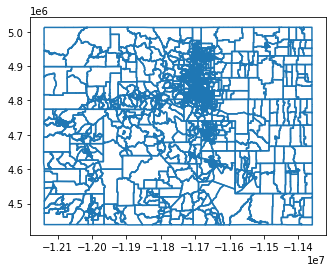

In [31]:
shapefiles_census.boundary.plot()

In [32]:
shapefiles_census.groupby('COUNTYFP')['VTDST'].count().compare(vest_shp.groupby('COUNTYFP')['VTDST'].count() ) #, keep_shape = True, keep_equal = True)

,self,other
COUNTYFP,,
001,255.0,259.0
013,234.0,240.0
031,346.0,356.0
035,155.0,168.0
041,279.0,291.0
059,258.0,309.0
069,203.0,212.0
071,15.0,16.0
087,17.0,18.0


<AxesSubplot:>

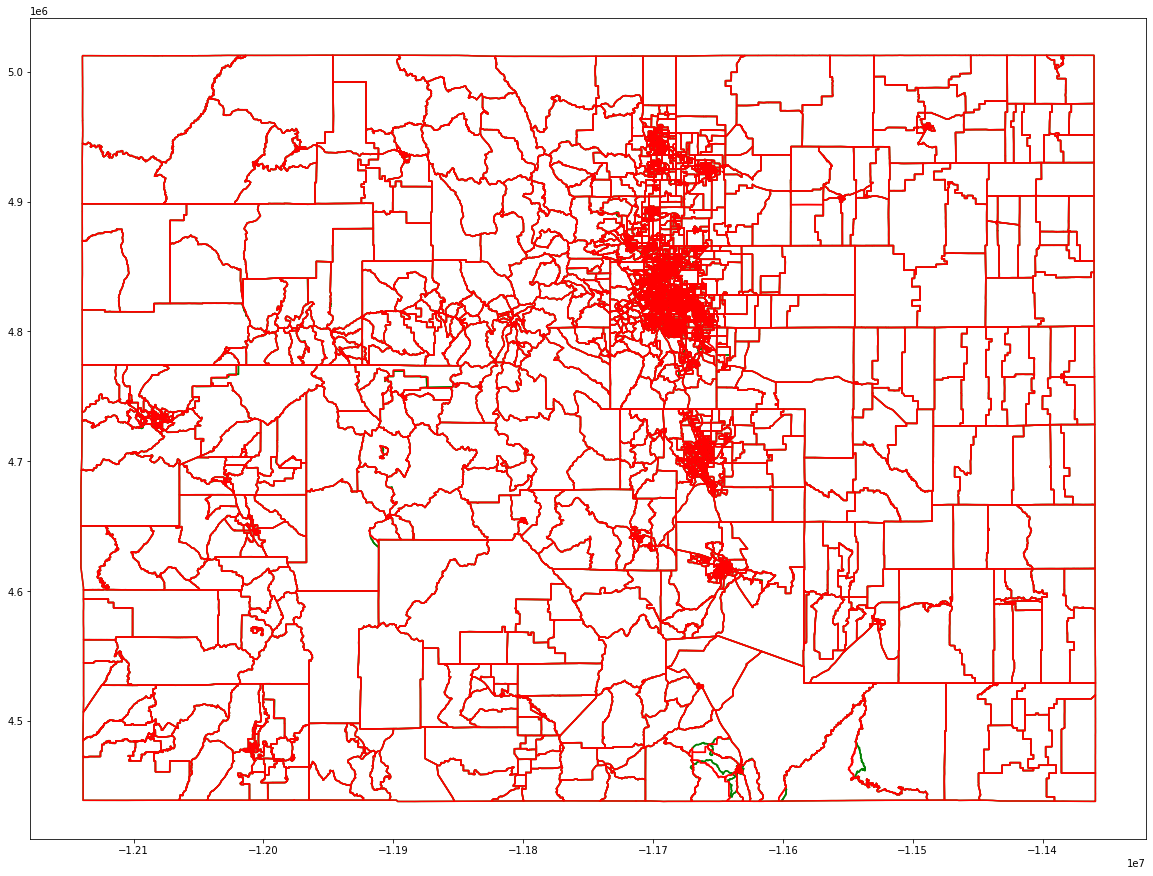

In [33]:
ax = shapefiles_census.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

## Replace counties sourced from county governments
VEST - The following counties used shapefiles sourced from the respective county governments instead: Adams, Arapahoe, Boulder, Delta, Denver, Douglas, El Paso, Fremont, Garfield, Gilpin, Jefferson, La Plata, Larimer, Mesa, Pitkin, Pueblo, Summit, Weld.

In [34]:
County_maps = ['001','005','013','029','031','035','041','043','045','047','059','067','069','077','097','101','117','123']
shapefiles_census = shapefiles_census[~shapefiles_census['COUNTYFP'].isin(County_maps)]

In [35]:
#Load county shapefiles
co_adams = gp.read_file('./raw-from-source/county_download/adams/2015_Precincts.shp')
co_adams = co_adams.to_crs(3857)
co_arapahoe = gp.read_file('./raw-from-source/county_download/arapahoe/Voter_Precincts_UTM.shp')
co_arapahoe = co_arapahoe.to_crs(3857)
co_boulder = gp.read_file('./raw-from-source/county_download/boulder/PRECINCTS_2016.shp')
co_boulder = co_boulder.to_crs(3857)
co_delta = gp.read_file('./raw-from-source/county_download/delta/DeltaVotePrec.shp')
co_delta = co_delta.to_crs(3857)
co_denver = gp.read_file('./raw-from-source/county_download/denver/Precincts_2016_Clean.shp')
co_denver = co_denver.to_crs(3857)
co_douglas = gp.read_file('./raw-from-source/county_download/douglas/Voter_Precincts.shp')
co_douglas = co_douglas.to_crs(3857)
co_el_paso = gp.read_file('./raw-from-source/county_download/el_paso/Precincts2016.shp')
co_el_paso = co_el_paso.to_crs(3857)
co_fremont = gp.read_file('./raw-from-source/county_download/fremont/Fremont_County_Precincts.shp')
co_fremont = co_fremont.to_crs(3857)
co_garfield = gp.read_file('./raw-from-source/county_download/garfield/VoterPrecincts2016.shp')
co_garfield = co_garfield.to_crs(3857)
co_gilpin = gp.read_file('./raw-from-source/county_download/gilpin/Voting Precincts 2.shp')
co_gilpin = co_gilpin.to_crs(3857)
co_jefferson = gp.read_file('./raw-from-source/county_download/jefferson/371d205b-b136-48f5-8450-2b7d31792bf6202043-1-132wt2o.zx5z.shp')
co_jefferson = co_jefferson.to_crs(3857)
co_la_plata = gp.read_file('./raw-from-source/county_download/la_plata/Precincts_old.shp')
co_la_plata = co_la_plata.to_crs(3857)
co_larimer = gp.read_file('./raw-from-source/county_download/larimer/VoterPrecinct.shp')
co_larimer = co_larimer.to_crs(3857)
co_mesa = gp.read_file('./raw-from-source/county_download/mesa/Voting_Precincts.shp')
co_mesa = co_mesa.to_crs(3857)
co_pitkin = gp.read_file('./raw-from-source/county_download/pitkin/VoterPrecinct.shp')
co_pitkin = co_pitkin.to_crs(3857)
co_pueblo = gp.read_file('./raw-from-source/county_download/pueblo/Pueblo_County_Precincts_190603.shp')
co_pueblo = co_pueblo.to_crs(3857)
co_summit = gp.read_file('./raw-from-source/county_download/summit/Blocks_Voters_Plan1_Dissolve.shp')
co_summit = co_summit.to_crs(3857)
co_weld = gp.read_file('./raw-from-source/county_download/weld/Weld_County_Precinct_2015.shp')
co_weld = co_weld.to_crs(3857)

In [36]:
#add COUNTYFP and VTDST to county shapefiles
co_adams['COUNTYFP']='001'
co_adams['VTDST'] = co_adams['COUNTYFP']+co_adams['Precinct']
co_arapahoe['COUNTYFP']='005'
co_arapahoe['VTDST'] = co_arapahoe['COUNTYFP']+co_arapahoe['PRECINCT']
co_boulder['COUNTYFP']='013'
co_boulder['VTDST'] = co_boulder['COUNTYFP']+co_boulder['ABBREVIATI'].astype(str)
co_delta['COUNTYFP']='029'
co_delta['VTDST'] = co_delta['COUNTYFP']+co_delta['Precinct_N'].apply(lambda x: x.zfill(3))
co_denver['COUNTYFP']='031'
co_denver['VTDST'] = co_denver['COUNTYFP']+co_denver['PRECINCT'].astype(int).astype(str)
co_douglas['COUNTYFP']='035'
co_douglas['VTDST'] = co_douglas['COUNTYFP']+co_douglas['PRECINCT'].astype(str)
co_el_paso['COUNTYFP']='041'
co_el_paso['VTDST'] = co_el_paso['COUNTYFP']+co_el_paso['PRECINCT'].astype(str)
co_fremont['COUNTYFP']='043'
co_fremont['VTDST'] = co_fremont['COUNTYFP']+co_fremont['id_full'].str[-3:]
co_garfield['COUNTYFP']='045'
co_garfield['VTDST'] = co_garfield['COUNTYFP']+co_garfield['PRECINCT'].astype(str).apply(lambda x: x.zfill(3))
co_gilpin['COUNTYFP']='047'
co_gilpin['VTDST'] = co_gilpin['COUNTYFP']+co_gilpin['precinctid'].astype(str).apply(lambda x: x.zfill(3))
co_jefferson['COUNTYFP']='059'
co_jefferson['VTDST'] = co_jefferson['COUNTYFP']+co_jefferson['COUNTYPREC'].str[-3:]
co_la_plata['COUNTYFP']='067'
co_la_plata['VTDST'] = co_la_plata['COUNTYFP']+co_la_plata['PRECINCT'].astype(str).apply(lambda x: x.zfill(3))
co_larimer['COUNTYFP']='069'
co_larimer['VTDST'] = co_larimer['COUNTYFP']+co_larimer['PRECINCT'].str[-3:]
co_mesa['COUNTYFP']='077'
co_mesa['VTDST'] = co_mesa['COUNTYFP']+co_mesa['Precinct'].astype(str).apply(lambda x: x.zfill(3))
co_pitkin['COUNTYFP']='097'
co_pitkin['VTDST'] = co_pitkin['COUNTYFP']+co_pitkin['PRECINCT'].astype(str).apply(lambda x: x.zfill(3))
co_pueblo['COUNTYFP']='101'
co_pueblo['VTDST'] = co_pueblo['COUNTYFP']+co_pueblo['PRECINCT_N'].astype(str).apply(lambda x: x.zfill(3))
co_summit['COUNTYFP']='117'
co_summit['VTDST'] = co_summit['COUNTYFP']+co_summit['Precincts'].astype(str).apply(lambda x: x.zfill(3))
co_weld['COUNTYFP']='123'
co_weld['VTDST'] = co_weld['COUNTYFP']+co_weld['PRECINCT'].str[-3:]

In [37]:
county_df_list = [co_adams[['COUNTYFP','VTDST','geometry']],co_arapahoe[['COUNTYFP','VTDST','geometry']],co_boulder[['COUNTYFP','VTDST','geometry']],co_delta[['COUNTYFP','VTDST','geometry']],co_denver[['COUNTYFP','VTDST','geometry']],co_douglas[['COUNTYFP','VTDST','geometry']],co_el_paso[['COUNTYFP','VTDST','geometry']],co_fremont[['COUNTYFP','VTDST','geometry']],co_garfield[['COUNTYFP','VTDST','geometry']],co_gilpin[['COUNTYFP','VTDST','geometry']],co_jefferson[['COUNTYFP','VTDST','geometry']],co_la_plata[['COUNTYFP','VTDST','geometry']],co_larimer[['COUNTYFP','VTDST','geometry']],co_mesa[['COUNTYFP','VTDST','geometry']],co_pitkin[['COUNTYFP','VTDST','geometry']],co_pueblo[['COUNTYFP','VTDST','geometry']],co_summit[['COUNTYFP','VTDST','geometry']],co_weld[['COUNTYFP','VTDST','geometry']]]

In [38]:
county_df = pd.concat(county_df_list, ignore_index=True)
print(county_df.crs)
print(shapefiles_census.crs)

epsg:3857
epsg:3857


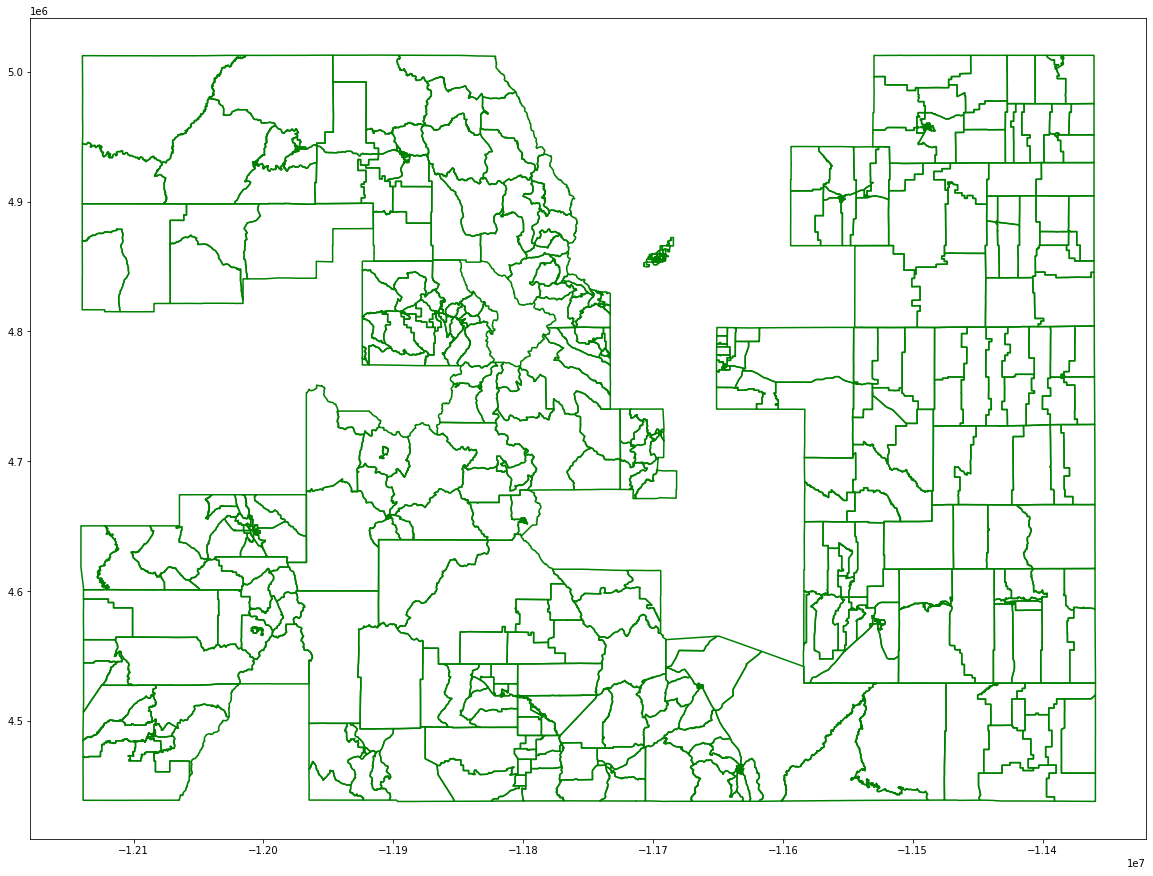

In [39]:
ax = shapefiles_census.boundary.plot(figsize=(20,20),color="green")

In [40]:
shapefiles_census = shapefiles_census.append(county_df, ignore_index = True)

<AxesSubplot:>

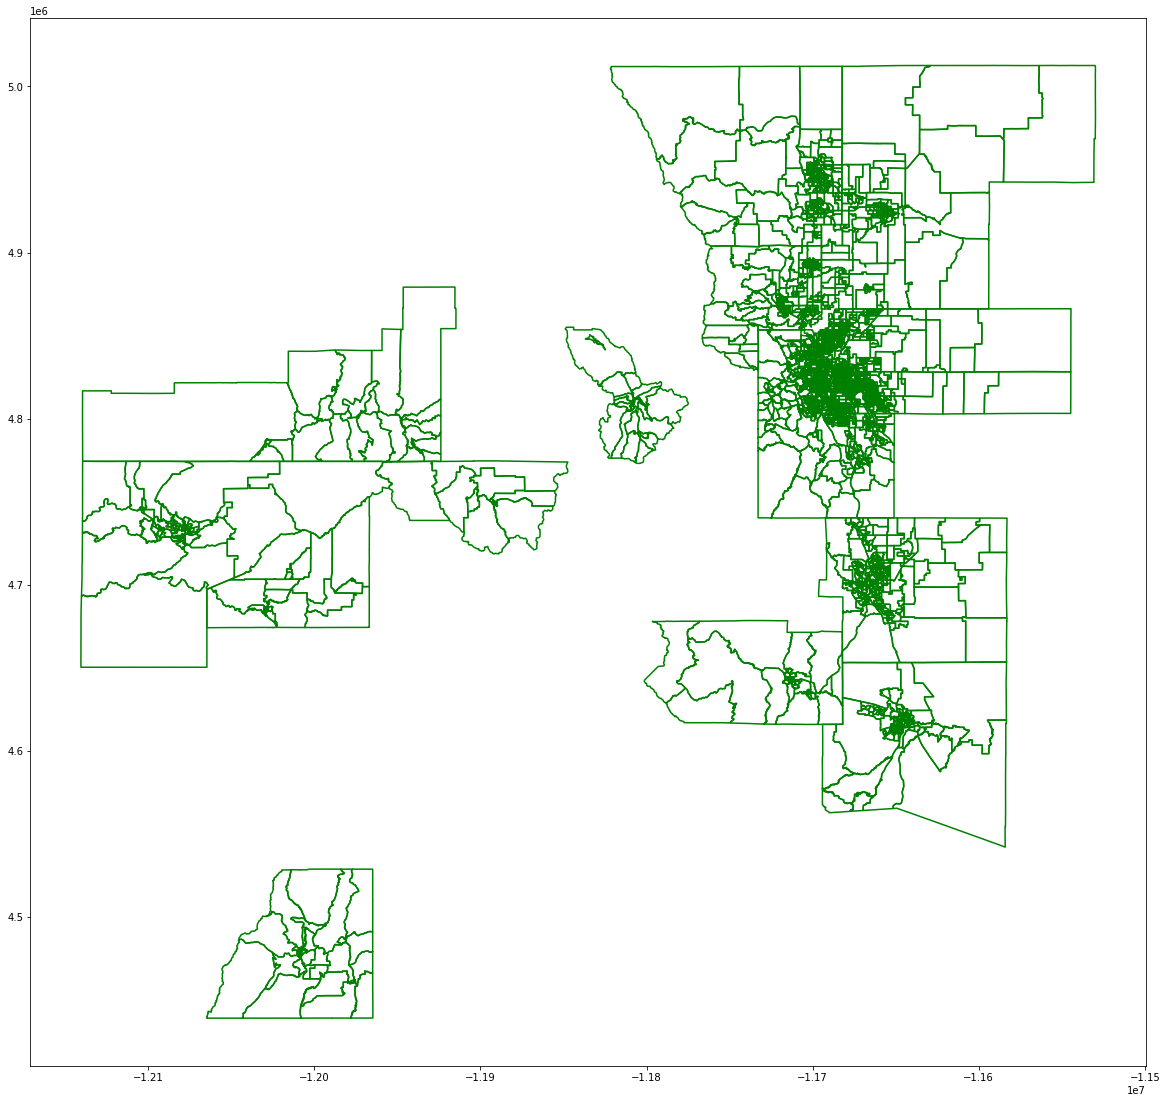

In [41]:
county_df.boundary.plot(figsize=(20,20),color="green")

<AxesSubplot:>

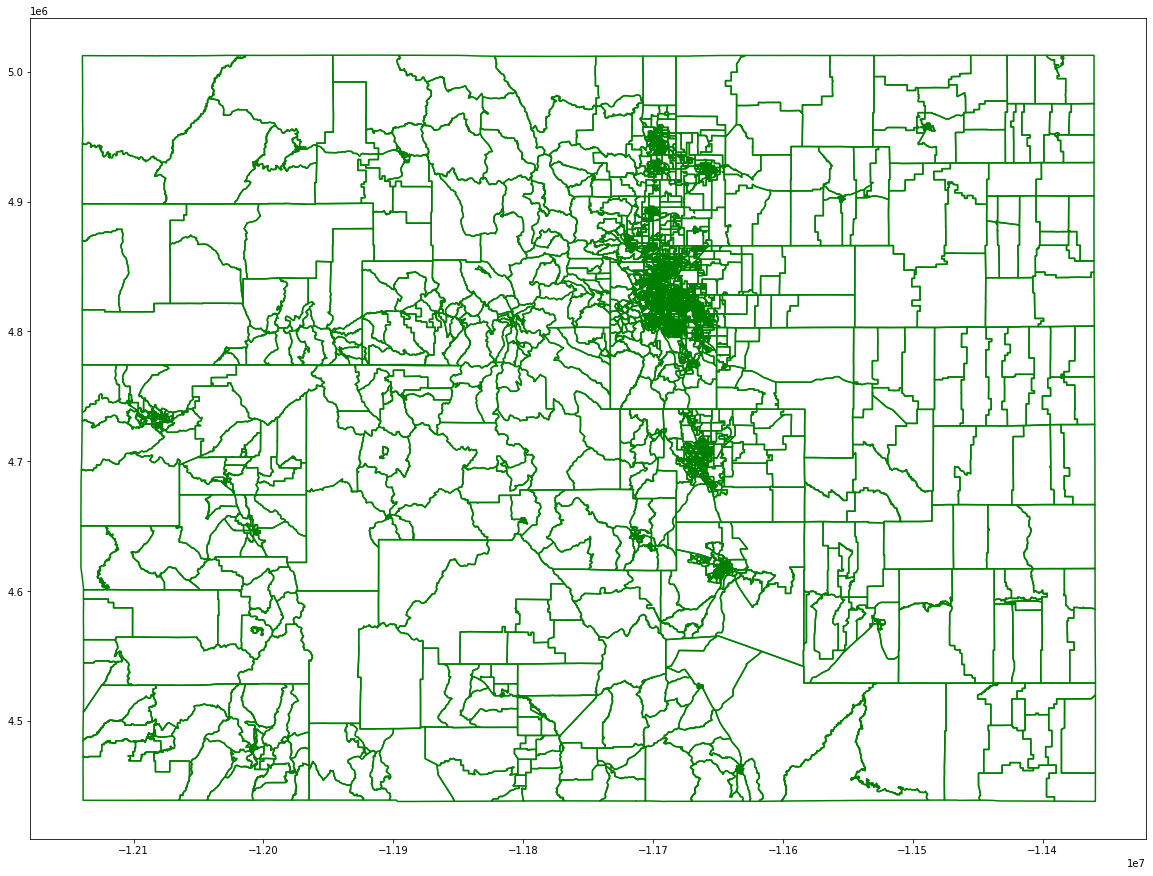

In [42]:
shapefiles_census.boundary.plot(figsize=(20,20),color="green")

<AxesSubplot:>

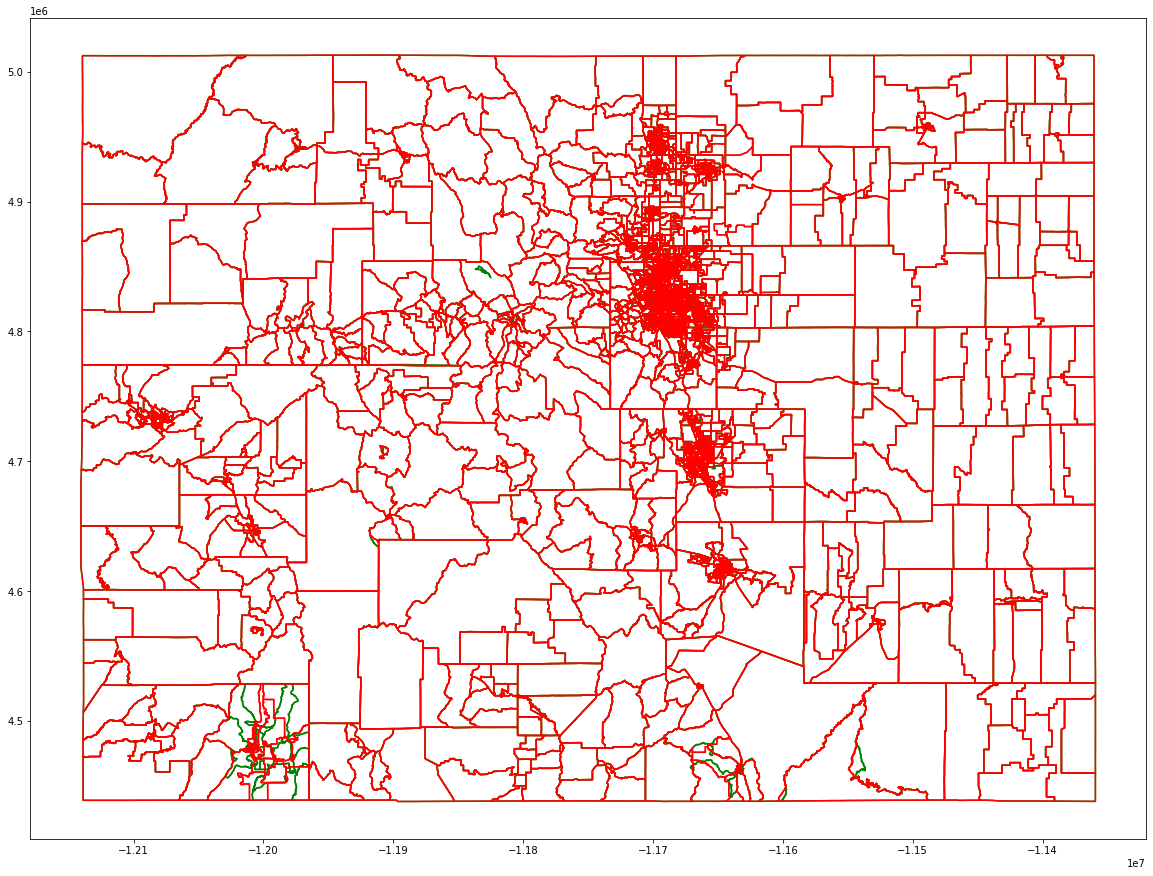

In [43]:
ax = shapefiles_census.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

## Join Election Results to Shapefile

In [44]:
election_results['VTDST'] = election_results['COUNTYFP']+election_results['Precinct'].str[-3:]
print(election_results.shape)


(3205, 18)


In [45]:
#Filter out duplicate IDs
ser = shapefiles_census["VTDST"].value_counts()
dup_ids = ser[ser >1].index
shapefiles_census = shapefiles_census[~shapefiles_census["VTDST"].isin(dup_ids)]
print(shapefiles_census.shape)

(3103, 16)


In [46]:
join_attempt_one = pd.merge(election_results,shapefiles_census,how="outer",on="VTDST",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          3092
left_only      113
right_only      11
Name: _merge, dtype: int64


In [47]:
final_source = join_attempt_one[join_attempt_one["_merge"]=="both"]

In [48]:
pd.set_option('display.max_rows', 1000)
print(join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP_x','Precinct','COUNTYFP_y','NAME','VTDST']])
pd.set_option('display.max_rows', 10)

     COUNTYFP_x    Precinct COUNTYFP_y       NAME   VTDST
15          059  1160130001        NaN        NaN  059001
144         031  1310816856        NaN        NaN  031856
182         031  1310916940        NaN        NaN  031940
237         031  1320216251        NaN        NaN  031251
266         031  1320916939        NaN        NaN  031939
318         031  1330716745        NaN        NaN  031745
319         031  1330716746        NaN        NaN  031746
428         031  1340516540        NaN        NaN  031540
429         031  1340516541        NaN        NaN  031541
430         031  1340516542        NaN        NaN  031542
431         031  1340516543        NaN        NaN  031543
692         059  2162530036        NaN        NaN  059036
748         013  2171207215        NaN        NaN  013215
773         013  2173307413        NaN        NaN  013413
774         013  2173307414        NaN        NaN  013414
900         013  2181307919        NaN        NaN  013919
1118        05

In [49]:
final_merge = pd.merge(final_source,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

both          3092
right_only     123
left_only        0
Name: final_merge, dtype: int64

In [50]:
print(final_merge[final_merge['final_merge'] != 'both'][['COUNTYFP_x','Precinct','COUNTYFP_y','NAME_y','join_col']])

     COUNTYFP_x Precinct COUNTYFP_y      NAME_y       join_col
3092        NaN      NaN        NaN   Adams 252  0016243401252
3093        NaN      NaN        NaN   Adams 250  0017253101250
3094        NaN      NaN        NaN   Adams 254  0017213201254
3095        NaN      NaN        NaN   Adams 255  0017213201255
3096        NaN      NaN        NaN   Adams 223  0017213201223
...         ...      ...        ...         ...            ...
3210        NaN      NaN        NaN   Adams 256  0016243101256
3211        NaN      NaN        NaN   Adams 259  0016245601259
3212        NaN      NaN        NaN   Adams 258  0016253001258
3213        NaN      NaN        NaN   Adams 257  0017213201257
3214        NaN      NaN        NaN  Morgan 018  0874016544018

[123 rows x 5 columns]


In [51]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    2255
True      837
dtype: int64


1) For 375.0-0.0 difference in area is 0.821325704973625
2) For 178.0-0.0 difference in area is 2.2415416793743446
3) For 155.0-2.0 difference in area is 1.3946241157053008
4) For 353.0-2.0 difference in area is 0.5053020518095742
5) For 372.0-2.0 difference in area is 1.6837169249536104
6) For 129.0-1.0 difference in area is 0.7052093020244329
7) For 477.0-2.0 difference in area is 2.1784766687166623
8) For 508.0-0.0 difference in area is 2.177275841320249
9) For 182.0-2.0 difference in area is 0.7241823926331572
10) For 420.0-1.0 difference in area is 0.7422533160932041
11) For 310.0-0.0 difference in area is 3.162594420934356
12) For 180.0-1.0 difference in area is 0.823234331081232
13) For 1263.0-3.0 difference in area is 90.02801992361118
14) For 638.0-3.0 difference in area is 13.763907418201715
15) For 48.0-0.0 difference in area is 410.6416199103674
16) For 1227.0-1.0 difference in area is 101.31109260239491
17) For 730.0-3.0 difference in area is 281.76641482604964
18) For 765

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


24) For 317.0-0.0 difference in area is 0.8204646217595059
25) For 893.0-2.0 difference in area is 1.2990316330401765
26) For 681.0-1.0 difference in area is 6.220056479795073
27) For 447.0-2.0 difference in area is 6.084502997694977
28) For 420.0-4.0 difference in area is 56.469218776162826
29) For 410.0-3.0 difference in area is 58.86457976448081
30) For 967.0-6.0 difference in area is 41.52148507706524
31) For 625.0-1.0 difference in area is 31.474553790479423
32) For 459.0-3.0 difference in area is 1.6736827098357705
33) For 796.0-1.0 difference in area is 14.070203781707463
34) For 919.0-0.0 difference in area is 15.848916617552689
35) For 561.0-1.0 difference in area is 75.24034890068019
36) For 603.0-2.0 difference in area is 4.816423537395585
37) For 738.0-0.0 difference in area is 10.439195234403268
38) For 177.0-0.0 difference in area is 46.3604453472029
39) For 645.0-1.0 difference in area is 38.836841373356556
40) For 567.0-0.0 difference in area is 18.622135605656684
41) F

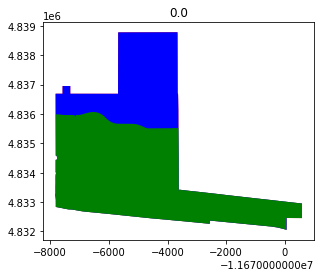

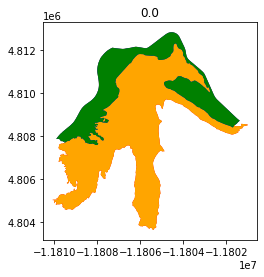

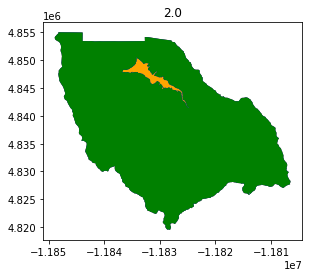

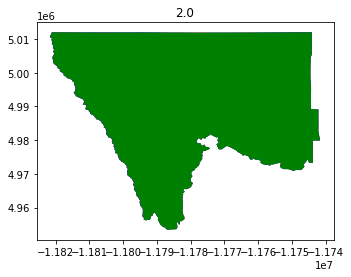

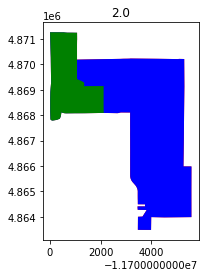

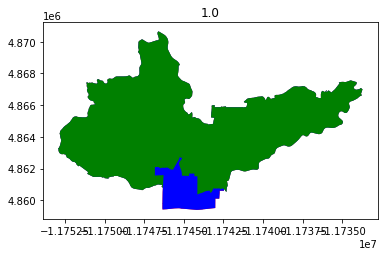

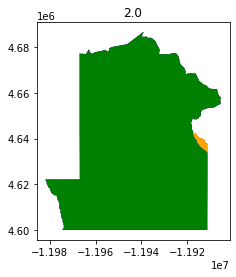

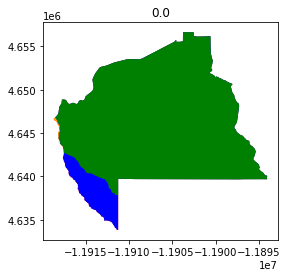

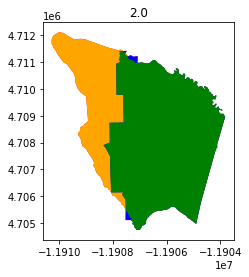

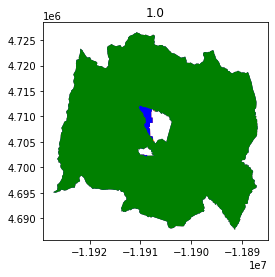

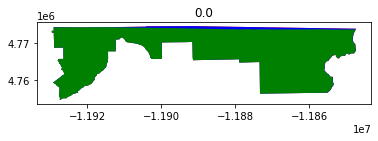

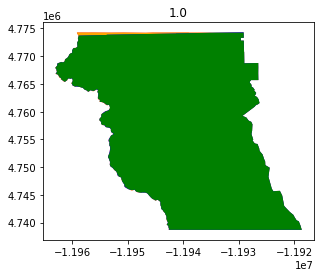

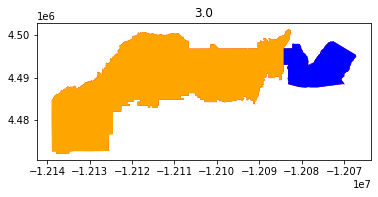

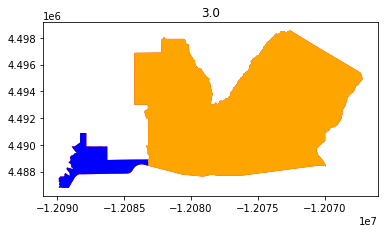

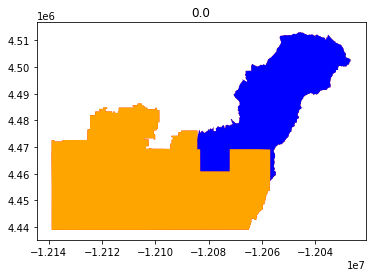

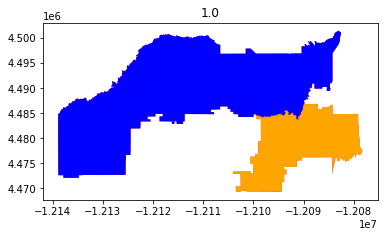

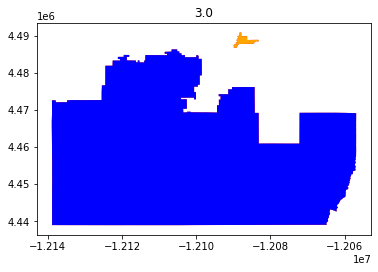

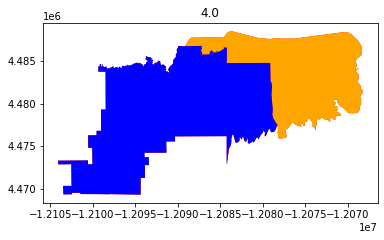

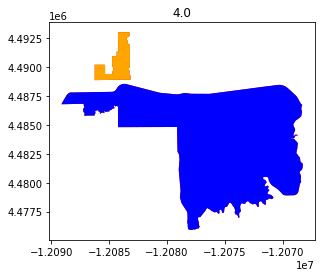

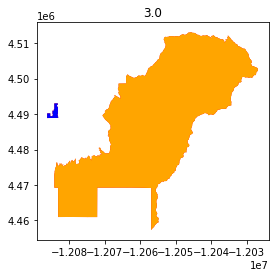

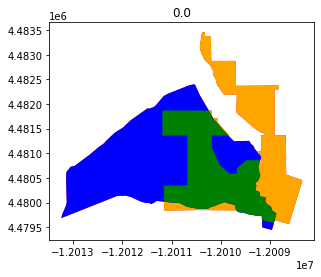

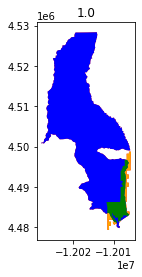

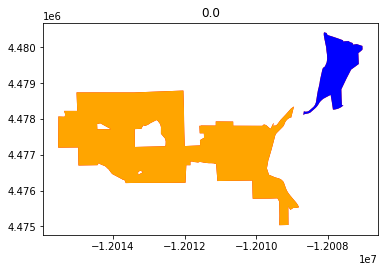

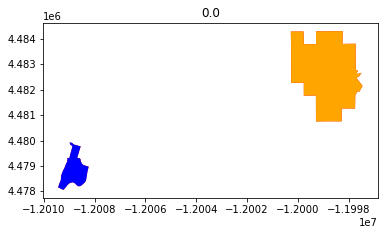

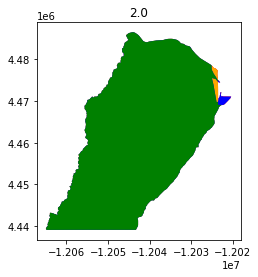

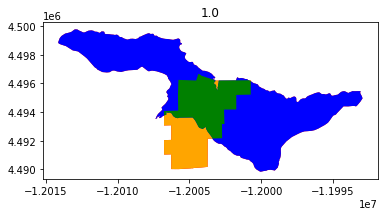

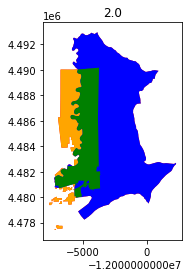

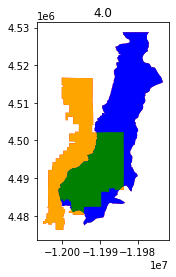

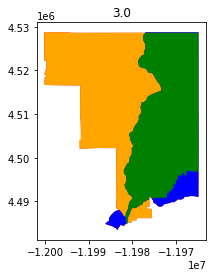

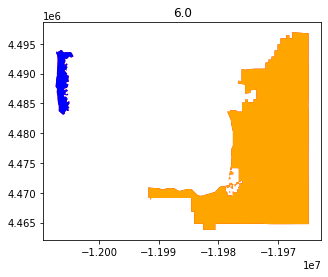

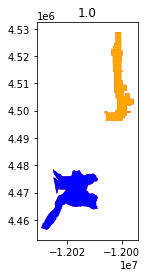

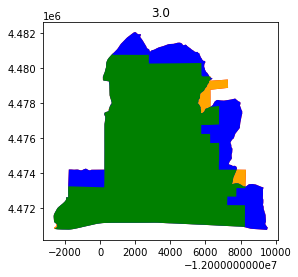

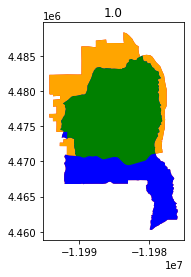

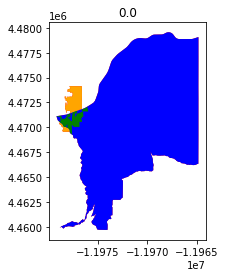

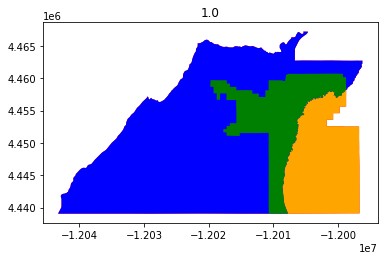

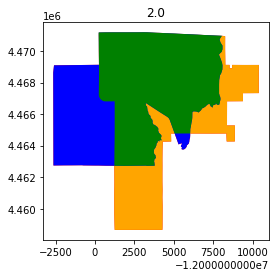

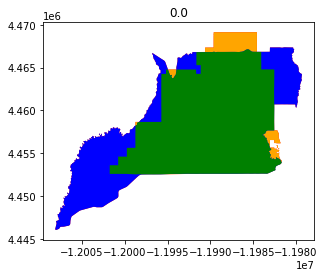

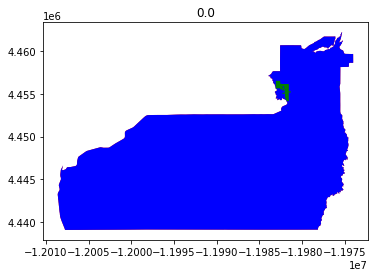

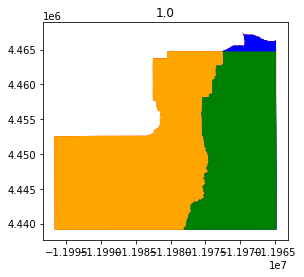

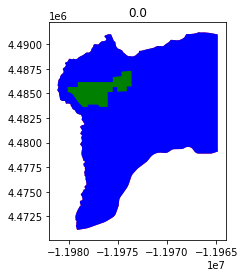

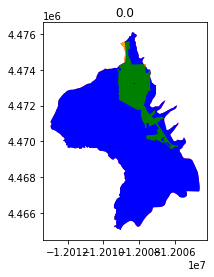

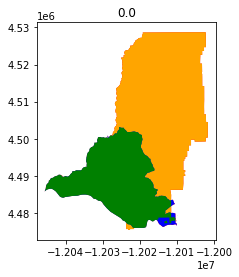

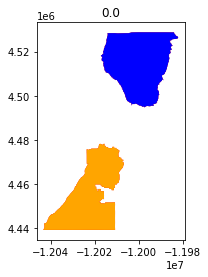

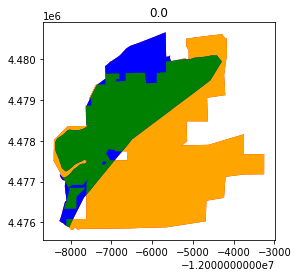

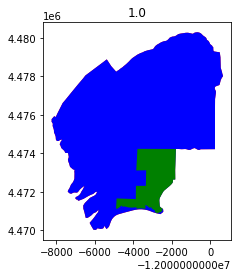

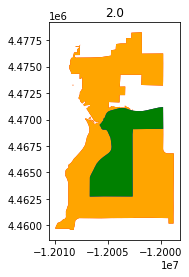

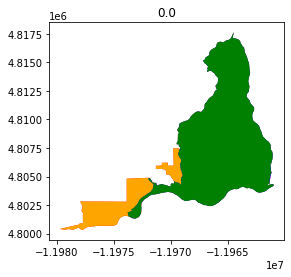

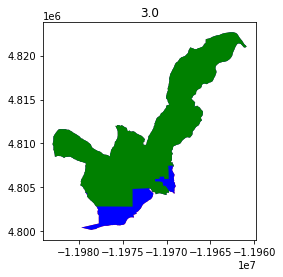

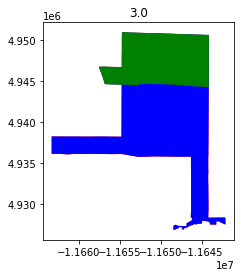

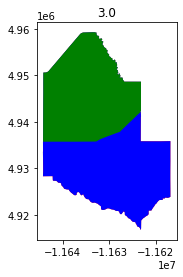

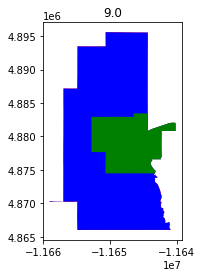

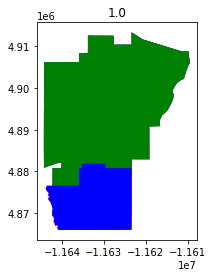

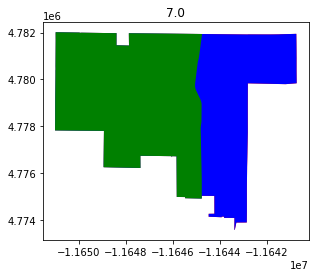

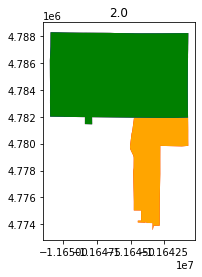

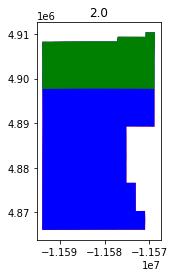

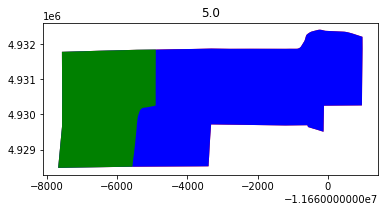

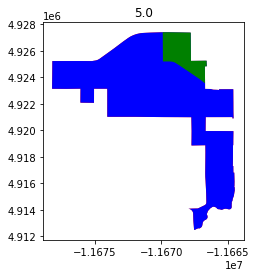

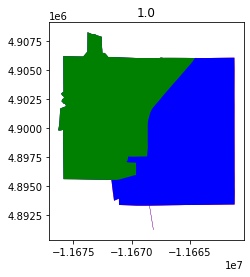

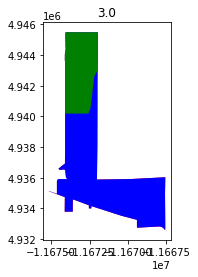

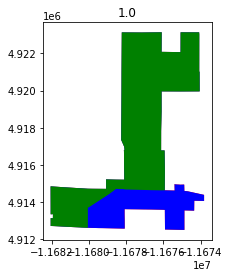

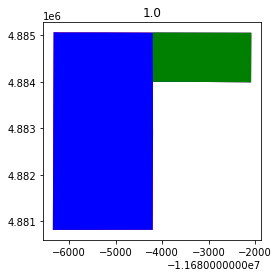

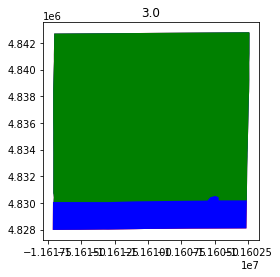

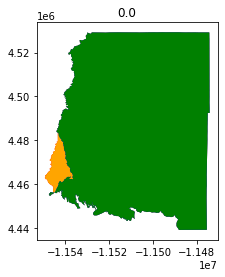

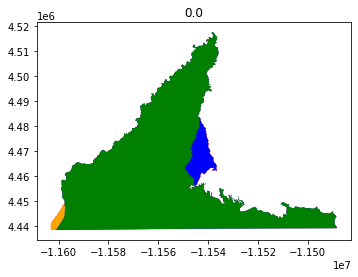

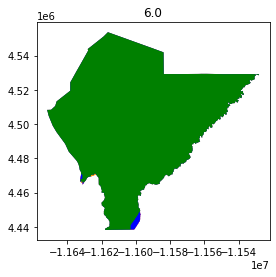

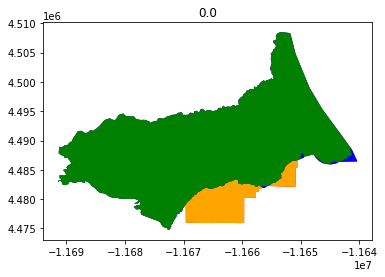

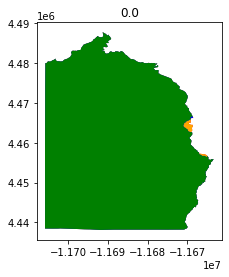

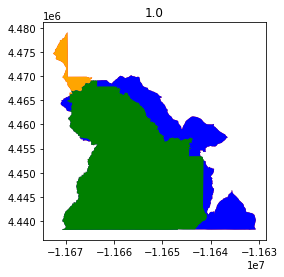

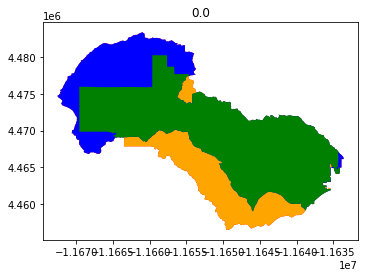

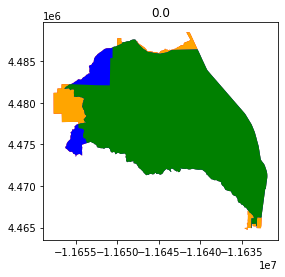

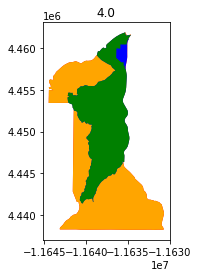

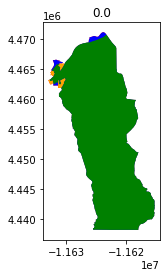

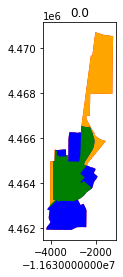

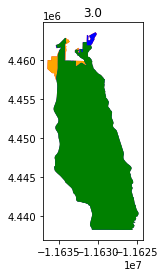

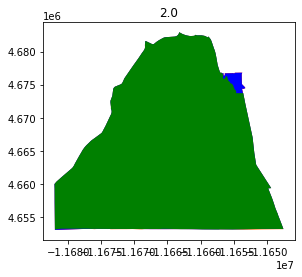

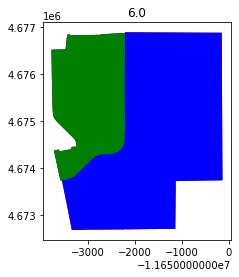

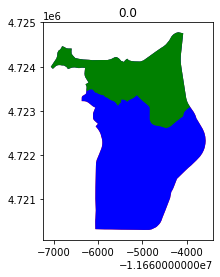

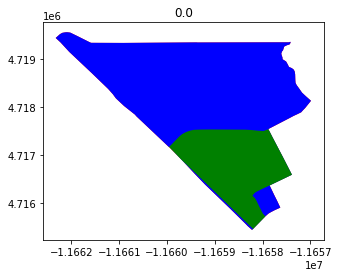

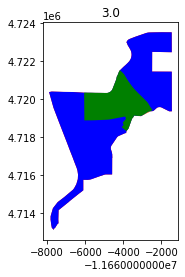

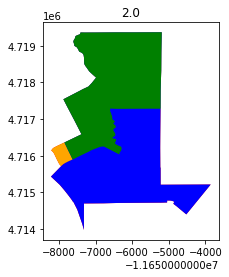

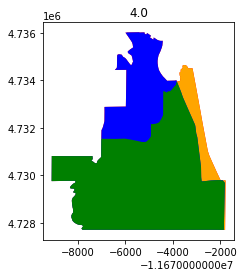

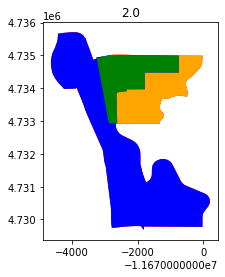

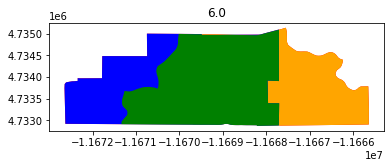

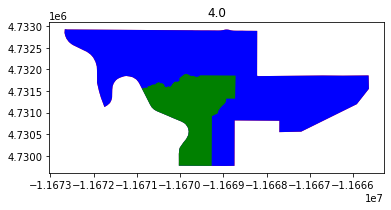

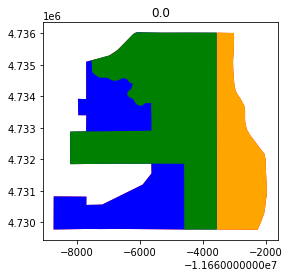

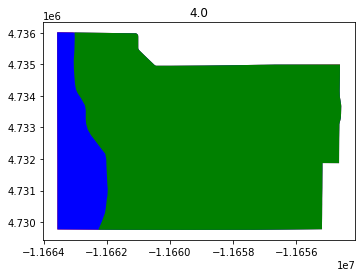

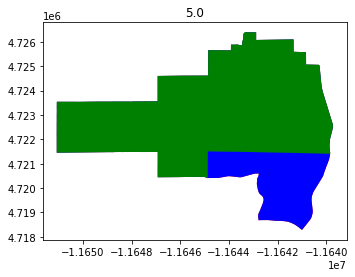

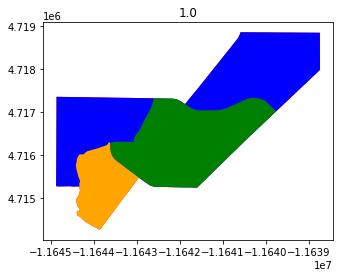

In [ ]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [ ]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

VEST- Las Animas County precinct assignments in the voter file differ markedly from both the Census VTD boundaries and from maps received from the county. All precincts were revised to match the geocoded voter file and the list of districts assigned to precinct splits. As appropriate, precinct boundaries were revised using Census blocks, the Trinidad municipal boundary shapefile, school district or fire district boundaries, and the parcel shapefile from the Las Animas County Assessor.

In [ ]:
ax = shapefiles_census[shapefiles_census['COUNTYFP']=='071'].boundary.plot(figsize=(20,20),color="green")
vest_shp[vest_shp['COUNTYFP']=='071'].boundary.plot(figsize=(20,20),ax=ax,color="red")